In [1]:
#imports
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from scipy.cluster import hierarchy as hie


plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = '14'

In [2]:
#read DB
df = pd.read_csv("HR.csv") 

In [3]:
#data types description
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
#statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#correlation matrix
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


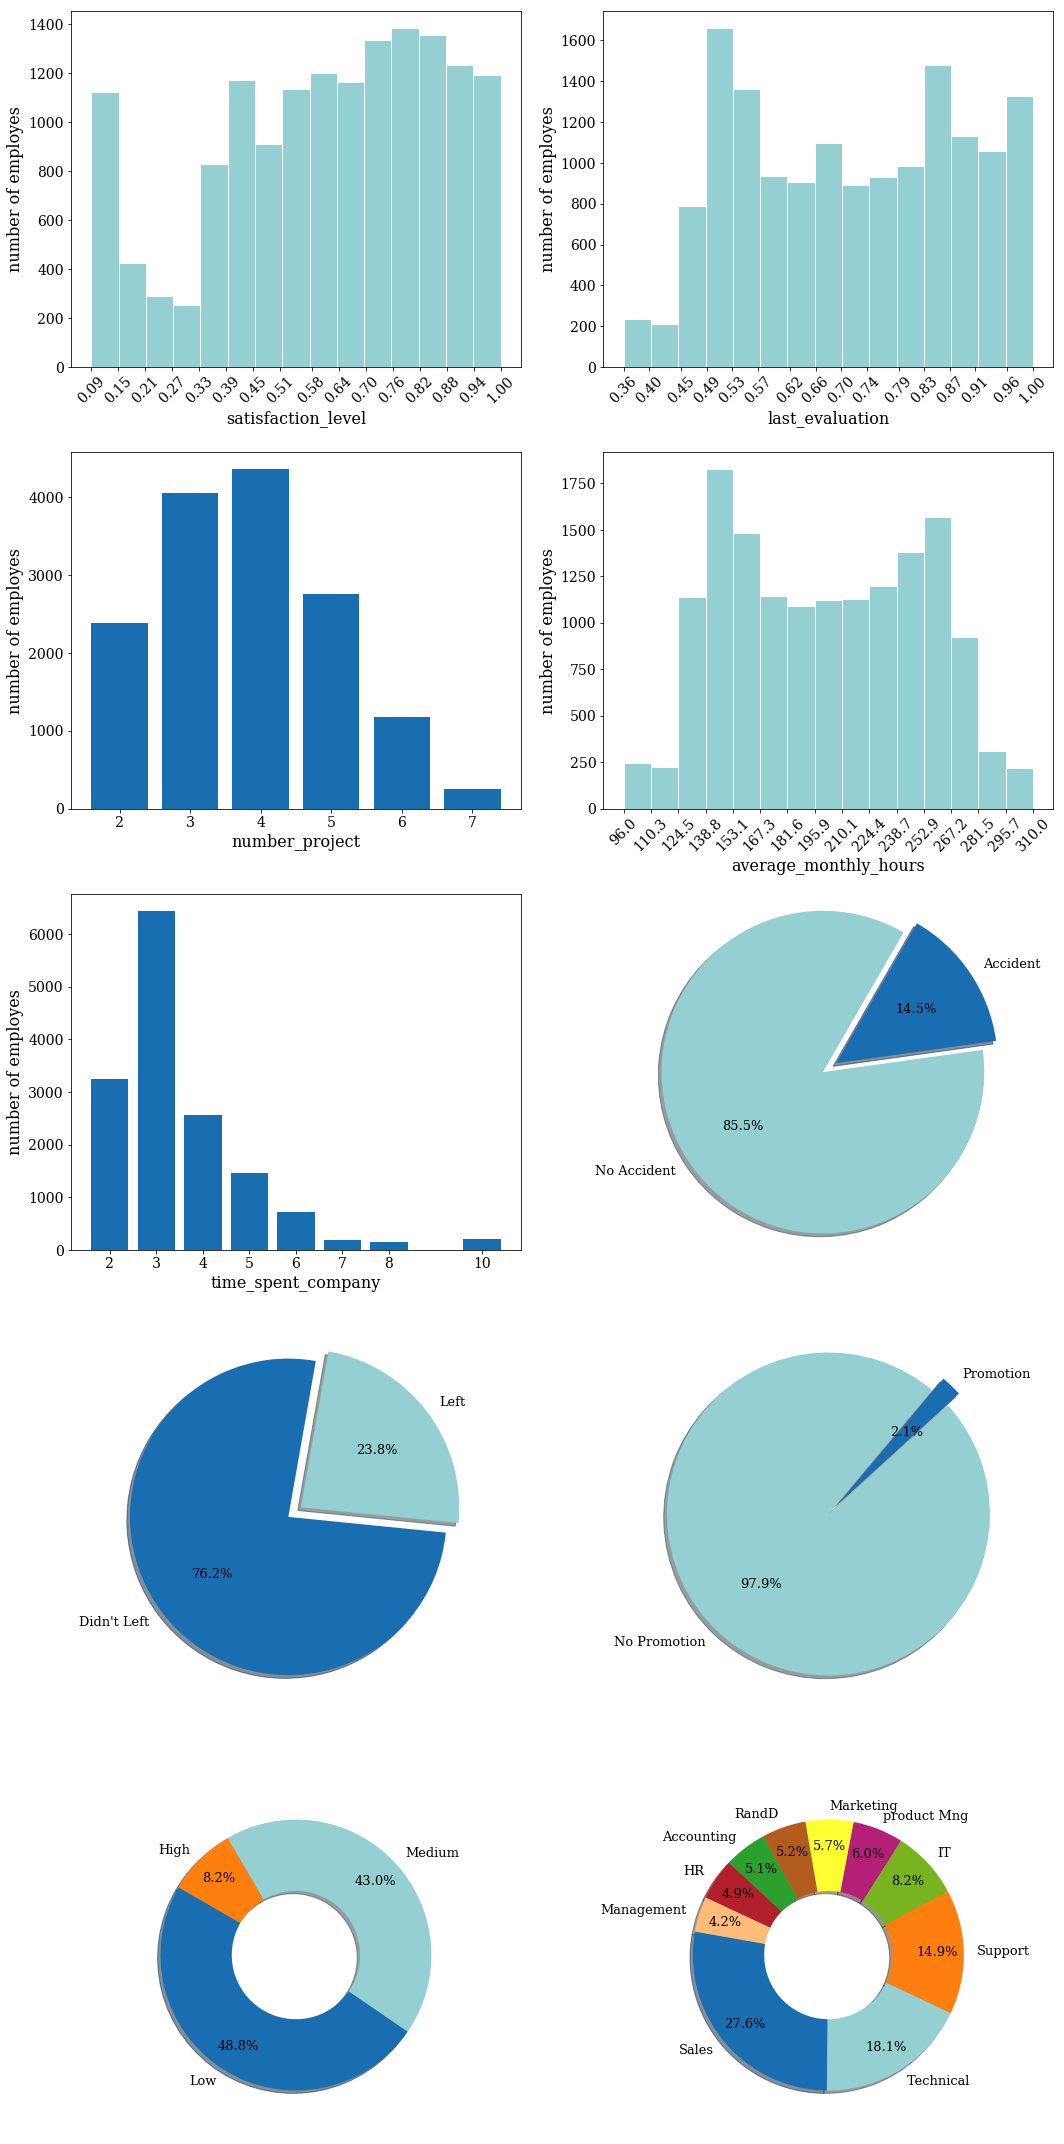

In [6]:
#single variables distribution
fig = plt.figure(figsize=(15, 30)) 
fig_dims = (5, 2)

#first row
#satisfaction level -- histogram
ax = plt.subplot2grid(fig_dims, (0, 0))
_, bins, _ = plt.hist(df['satisfaction_level'], 15, color = '#94CFD2', ec='#FFFFFF')
#plt.title('satisfaction_level', fontsize = 22)
ax.set_xlabel("satisfaction_level", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#last evaluation -- histogram
ax = plt.subplot2grid(fig_dims, (0, 1))
_, bins, _ = plt.hist(df['last_evaluation'], 15, color = '#94CFD2', ec='#FFFFFF')
#plt.title('last_evaluation', fontsize = 22)
ax.set_xlabel("last_evaluation", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#number project -- bar
ax = plt.subplot2grid(fig_dims, (1, 0))
y = df['number_project'].value_counts(sort= False)
x = range(2, 8)
plt.bar(x, y, color = '#186EB1')
#plt.title('number_project', size = 22)
ax.set_xlabel("number_project", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#second row
#average monthly hours -- histogram
ax = plt.subplot2grid(fig_dims, (1, 1))
_, bins, _ = plt.hist(df['average_montly_hours'], 15, color = '#94CFD2', ec='#FFFFFF')
#plt.title('average_monthly_hours', size = 22)
ax.set_xlabel("average_monthly_hours", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#time spent company -- bar
ax = plt.subplot2grid(fig_dims, (2, 0))
y = df['time_spend_company'].value_counts()
x = (3,2,4,5,6,10,7,8)
plt.bar(x, y, color = '#186EB1')
plt.xticks(x)
#plt.title('time_spent_company', size = 22)
ax.set_xlabel("time_spent_company", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#work accident -- pie
ax = plt.subplot2grid(fig_dims, (2, 1))
labels = 'No Accident', 'Accident'
sizes = df['Work_accident'].value_counts()
explode = (0, 0.1)
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, colors=('#94CFD2','#186EB1'))
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 
#plt.title('work_accident', size = 22)

#third row
#left -- pie
ax = plt.subplot2grid(fig_dims, (3, 0))
labels = 'Didn\'t Left', 'Left'
sizes = df['left'].value_counts()
explode = (0, 0.1)
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=80, colors=('#186EB1','#94CFD2'))
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 
#plt.title('left', size = 22)

#promotion last 5 years -- pie
ax = plt.subplot2grid(fig_dims, (3, 1))
labels = 'No Promotion', 'Promotion'
sizes = df['promotion_last_5years'].value_counts()
explode = (0, 0.1)
inside, texts, ltexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=50, colors=('#94CFD2','#186EB1'))
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
ax.axis('equal') 
#plt.title('promotion_last_5years', size = 22)

#salary -- bar
ax = plt.subplot2grid(fig_dims, (4, 0))
labels = 'Low', 'Medium', 'High'
sizes = df['salary'].value_counts()
ax.axis('equal') 
co = ('#186EB1', '#94CFD2', '#FF7F0E')
kwargs = dict(colors=co, startangle=150, autopct='%1.1f%%')
inside, texts, ltexts = ax.pie(sizes, radius=0.95, labels=labels, pctdistance=0.8, shadow=True, **kwargs)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
plt.setp(inside, width=0.50)
#plt.title('Salary', size = 22)

#sales -- pie
ax = plt.subplot2grid(fig_dims, (4, 1))
labels = 'Sales', 'Technical', 'Support', 'IT', 'product Mng', 'Marketing', 'RandD', 'Accounting', 'HR', 'Management'
sizes = df['sales'].value_counts()
ax.axis('equal') 
co = ('#186EB1', '#94CFD2', '#FF7F0E', '#77b41f', '#b41f77', '#ffff32', '#b45c1f', '#2ca02c', '#b41f2c','#ffbb78')
kwargs = dict(colors=co, startangle=170, autopct='%1.1f%%')
inside, texts, ltexts = ax.pie(sizes, radius=0.95, labels=labels, pctdistance=0.8, shadow=True, **kwargs)
for i in range(len(texts)):
    texts[i].set_fontsize(13)
    ltexts[i].set_fontsize(13)
plt.setp(inside, width=0.50)
#plt.title('department', size = 22)

plt.tight_layout()

plt.show()

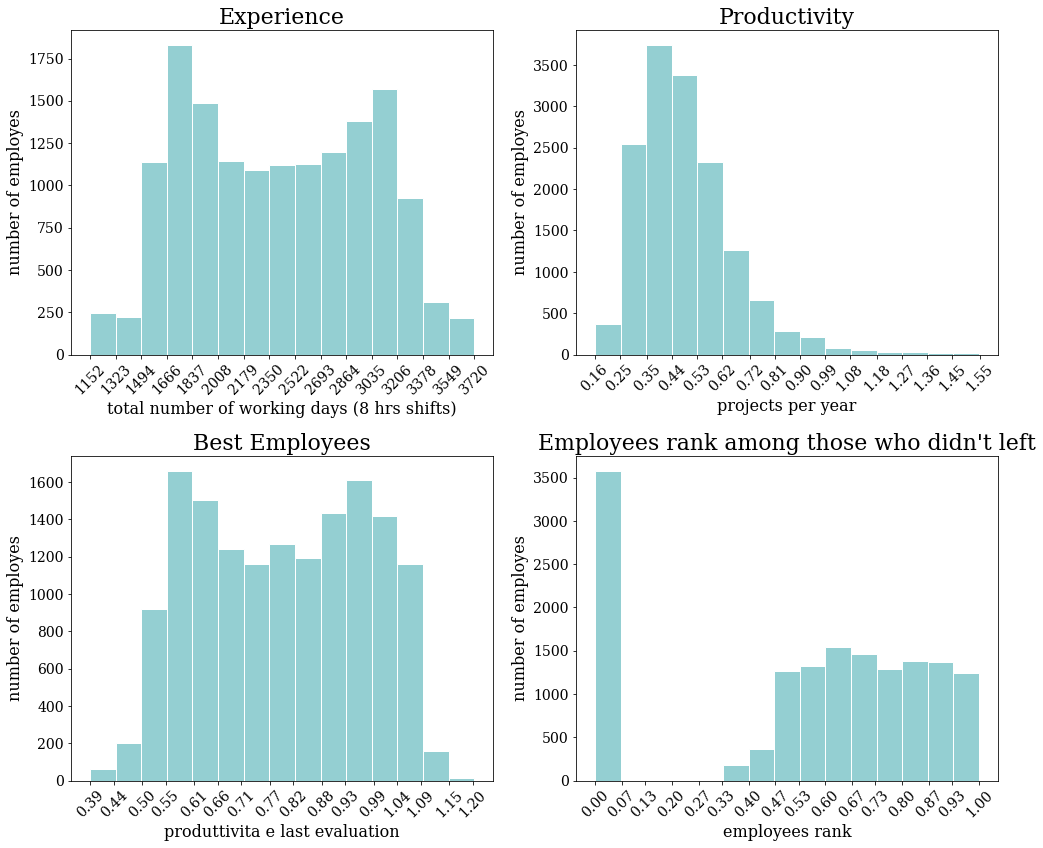

In [7]:
#variable transformation experiments

fig = plt.figure(figsize=(15, 12)) 
fig_dims = (2, 2)

#experience -- hist
tot_hours = df['average_montly_hours']*12
experience = tot_hours

ax = plt.subplot2grid(fig_dims, (0, 0))
_, bins, _ = plt.hist(experience, 15, color = '#94CFD2', ec='#FFFFFF')
plt.title('Experience', size = 22)
ax.set_xlabel("total number of working days (8 hrs shifts)", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#productivity
tot_months = experience/25
effective_years =  tot_months/12
productivity = df['number_project']/effective_years
ax = plt.subplot2grid(fig_dims, (0, 1))
_, bins, _ = plt.hist(productivity, 15, color = '#94CFD2', ec='#FFFFFF')
plt.title('Productivity', size = 22)
ax.set_xlabel("projects per year", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#employees rank
productivity_normalized = productivity/6
rank_employees =productivity_normalized + df['last_evaluation']
ax = plt.subplot2grid(fig_dims, (1, 0))
_, bins, _ = plt.hist(rank_employees, 15, color = '#94CFD2', ec='#FFFFFF')
plt.title('Best Employees', size = 22)
ax.set_xlabel("produttivita e last evaluation", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)

#employees rank who didn't left
productivity_normalized = productivity/6
rank_employees =df['last_evaluation']
who_no_left = rank_employees*(1-df['left'])
ax = plt.subplot2grid(fig_dims, (1, 1))
_, bins, _ = plt.hist(who_no_left, 15, color = '#94CFD2', ec='#FFFFFF')
plt.title('Employees rank among those who didn\'t left', size = 22)
ax.set_xlabel("employees rank", fontsize=16)
ax.set_ylabel("number of employes", fontsize=16)
for i in range(len(bins)):
    bins[i] = round(bins[i], 2)
ax.set_xticks(bins)
plt.xticks(fontsize=14, rotation = '45')
plt.yticks(fontsize=14)


plt.tight_layout()

plt.show()

In [8]:
#normalization
df_norm = pd.read_csv("HR.csv") 

def normalize(dataset, min_dataset, max_dataset):
    result = []
    for i in dataset:
        new_value = (i - min_dataset)/(float(max_dataset - min_dataset))*(1-0.1)+0.1
        result.append(new_value)
    return result

#massimi - minimi
min_number_project = min(df_norm['number_project'])
max_number_project = max(df_norm['number_project'])

min_time_spend_company = min(df_norm['time_spend_company'])
max_time_spend_company = max(df_norm['time_spend_company'])

min_average_montly_hours = min(df_norm['average_montly_hours'])
max_average_montly_hours = max(df_norm['average_montly_hours'])

#normalizzazioni
normalized_number_project = normalize(df_norm['number_project'], min_number_project, max_number_project)
normalized_time_spend_company = normalize(df_norm['time_spend_company'], min_time_spend_company, max_time_spend_company)
normalized_average_montly_hours = normalize(df_norm['average_montly_hours'], min_average_montly_hours, max_average_montly_hours)

salary_int= sorted(df_norm['salary'].unique())
salary_int_mapping = dict(zip(salary_int, [1, 0, 0.5]))

In [9]:
#data frame normalizzato
df_norm = df[['satisfaction_level','last_evaluation']]
df_norm = df_norm.assign(normalized_number_project=normalized_number_project, normalized_time_spend_company = normalized_time_spend_company, normalized_average_montly_hours = normalized_average_montly_hours)
df_norm['normalized_salary'] = df['salary'].map(salary_int_mapping).astype(float)
df_norm.head()

,satisfaction_level,last_evaluation,normalized_average_montly_hours,normalized_number_project,normalized_time_spend_company,normalized_salary
0,0.38,0.53,0.356542,0.10,0.2125,0.0
1,0.80,0.86,0.798131,0.64,0.5500,0.5
2,0.11,0.88,0.840187,1.00,0.3250,0.5
3,0.72,0.87,0.634112,0.64,0.4375,0.0
4,0.37,0.52,0.364953,0.10,0.2125,0.0


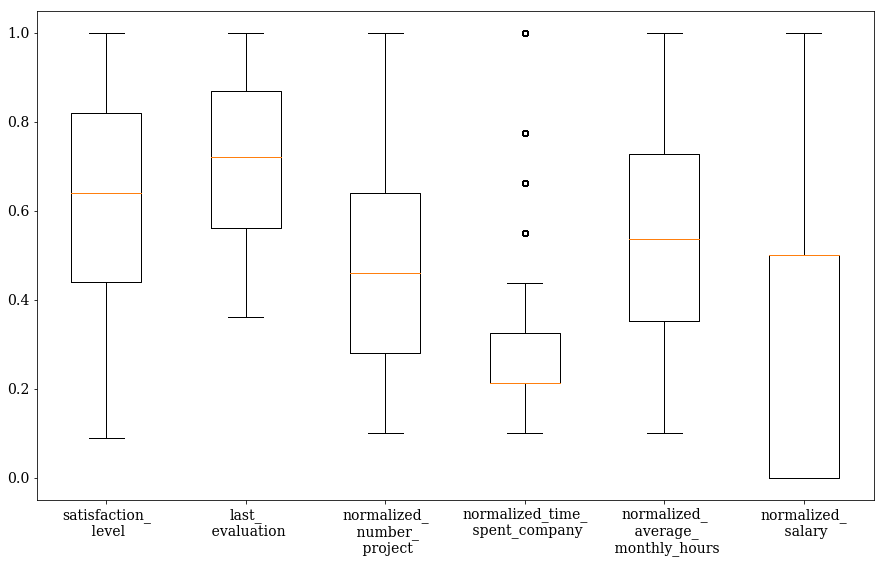

In [10]:
#boxplot
fig = plt.figure(1, figsize=(15, 9))
ax = fig.add_subplot(111)
boxplot_data = [df_norm['satisfaction_level'], df_norm['last_evaluation'], 
                normalized_number_project, normalized_time_spend_company, normalized_average_montly_hours, 
                df_norm['normalized_salary']]
boxplot_labels = ['satisfaction_\n level', 'last_\n evaluation', 'normalized_\n number_\n project', 'normalized_time_\n spent_company', 'normalized_\n average_\n monthly_hours', 'normalized_\n salary']
bp = ax.boxplot(boxplot_data, labels=boxplot_labels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Box Plots', size = 22)

plt.savefig('../Images/Data_Understanding/BoxPlot.png', format='png', bbox_inches='tight')

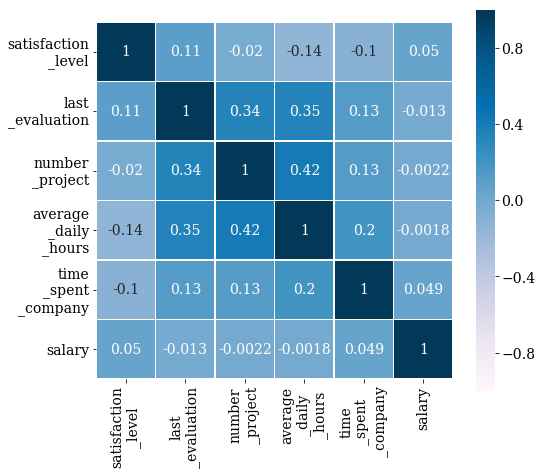

In [11]:
#correlation plot
cmap = cm.get_cmap('PuBu')

fig = plt.figure()
fig.set_size_inches(8,7)

correlati = df_norm.corr()
ax = sns.heatmap(correlati, square=True, cmap=cmap, vmin = -1, vmax = 1, annot = True,linewidths=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = ['satisfaction\n_level', 'last\n_evaluation', 'number\n_project', 'average\n_daily\n_hours', 'time\n_spent\n_company', 'salary']
#plt.title('Heatmap of correlation matrix', size = 22)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.savefig('../Images/Data_Understanding/HeatMap.png', format='png', bbox_inches='tight')

In [12]:
#data frame di chi ha lasciato e di chi è rimasto
df_trimmed = pd.read_csv("HR.csv")

del df_trimmed['promotion_last_5years']
del df_trimmed['Work_accident']

df_stayed = df_trimmed[df_trimmed['left'] == 0]
df_left = df_trimmed[df_trimmed['left'] == 1]

del df_stayed['left']
del df_left['left']
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,sales,salary
0,0.38,0.53,2,157,3,sales,low
1,0.80,0.86,5,262,6,sales,medium
2,0.11,0.88,7,272,4,sales,medium
3,0.72,0.87,5,223,5,sales,low
4,0.37,0.52,2,159,3,sales,low


In [13]:
#data frame di chi ha lasciato e di chi è rimasto
df_trimmed = df_norm
df_trimmed['left'] = df['left']

df_stayed = df_trimmed[df_trimmed['left'] == 0]
df_left = df_trimmed[df_trimmed['left'] == 1]

del df_stayed['left']
del df_left['left']

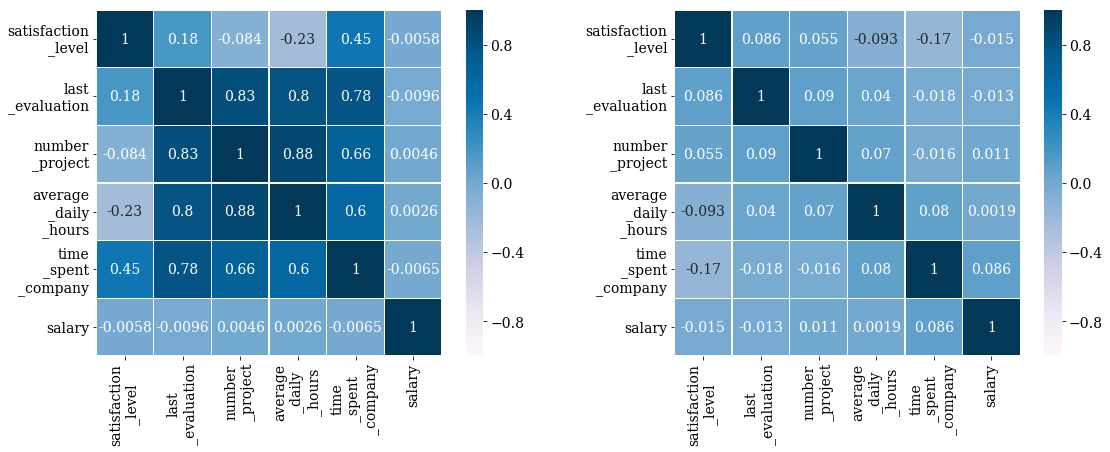

In [14]:
#correlation plot di quelli che hanno lasciato
cmap = cm.get_cmap('PuBu')

fig = plt.figure(figsize=(19, 14)) 
fig_dims = (2, 2)

ax = plt.subplot2grid(fig_dims, (0, 0))
correlati = df_left.corr('pearson')
ax = sns.heatmap(correlati, square=True, cmap=cmap, vmin = -1, vmax = 1, annot = True,linewidths=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = ['satisfaction\n_level', 'last\n_evaluation', 'number\n_project', 'average\n_daily\n_hours', 'time\n_spent\n_company', 'salary']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
#plt.title('Heatmap di chi ha lasciato', size = 20)

ax = plt.subplot2grid(fig_dims, (0, 1))
correlati = df_stayed.corr('pearson')
ax = sns.heatmap(correlati, square=True, cmap=cmap, vmin = -1, vmax = 1, annot = True,linewidths=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
labels = ['satisfaction\n_level', 'last\n_evaluation', 'number\n_project', 'average\n_daily\n_hours', 'time\n_spent\n_company', 'salary']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
#plt.title('Heatmap di chi e\' rimasto', size = 20)

plt.savefig('../Images/Data_Understanding/HeatMap_left.png', format='png', bbox_inches='tight')